In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap
from bs4 import BeautifulSoup
import re
import emoji
from sklearn import metrics

from autocorrect import Speller
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Torch ML libraries
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

from text_preprocessing import preprocess_text
from text_preprocessing import to_lower, remove_punctuation, lemmatize_word,check_spelling,expand_contraction,keep_alpha_numeric,remove_special_character,remove_stopword,remove_whitespace,remove_number
preprocessing_to_apply = [preprocess_text,to_lower, remove_punctuation, lemmatize_word,check_spelling,expand_contraction,keep_alpha_numeric,remove_special_character,remove_stopword,remove_whitespace] 


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\NSK\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
df = pd.read_csv("HARP_ThoughtSampling_TextData_092022.csv",encoding= 'latin-1')
df=df[:4565]

In [3]:
df.drop(df[df['ThoughtSamplTEXT_1_CodeTR02'] =="(no description provided)"].index, inplace = True)
df.drop(df[df['ThoughtSamplTEXT_1_CodeTR02'] =="[translation pending]"].index, inplace = True)
df.drop(df[df['ThoughtSamplTEXT_1_CodeTR02'] =="(no recording)"].index, inplace = True)
df.drop(df[df['ThoughtSamplTEXT_1_CodeTR02'] =="[no recording]"].index, inplace = True)
df.drop(df[df['ThoughtSamplTEXT_1_CodeTR02'] =="[no entry]"].index, inplace = True)
df.drop(df[df['ThoughtSamplTEXT_1_CodeTR02'] =="nothing"].index, inplace = True)

df.drop(df[df['ThoughtSamplTEXT_2_CodeTR02'] =="(no description provided)"].index, inplace = True)
df.drop(df[df['ThoughtSamplTEXT_2_CodeTR02'] =="[translation pending]"].index, inplace = True)
df.drop(df[df['ThoughtSamplTEXT_2_CodeTR02'] =="(no recording)"].index, inplace = True)
df.drop(df[df['ThoughtSamplTEXT_2_CodeTR02'] =="[no recording]"].index, inplace = True)
df.drop(df[df['ThoughtSamplTEXT_2_CodeTR02'] =="[no entry]"].index, inplace = True)
df.drop(df[df['ThoughtSamplTEXT_2_CodeTR02'] =="nothing"].index, inplace = True)

df.drop(df[df['ThoughtSamplTEXT_3_CodeTR02'] =="(no description provided)"].index, inplace = True)
df.drop(df[df['ThoughtSamplTEXT_3_CodeTR02'] =="[translation pending]"].index, inplace = True)
df.drop(df[df['ThoughtSamplTEXT_3_CodeTR02'] =="(no recording)"].index, inplace = True)
df.drop(df[df['ThoughtSamplTEXT_3_CodeTR02'] =="[no recording]"].index, inplace = True)
df.drop(df[df['ThoughtSamplTEXT_3_CodeTR02'] =="[no entry]"].index, inplace = True)
df.drop(df[df['ThoughtSamplTEXT_3_CodeTR02'] =="nothing"].index, inplace = True)

In [4]:
df.dropna(subset=['ThoughtSamplMODE_1_CodeTR01'],inplace=True)

C:\Users\NSK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


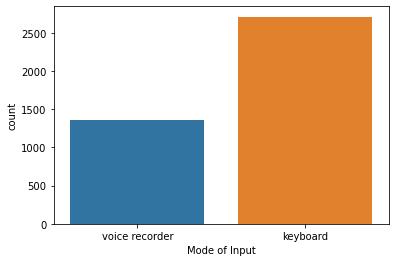

In [5]:
sns.countplot(df.ThoughtSamplMODE_1_CodeTR01)
plt.xlabel('Mode of Input');

In [6]:
df.drop(columns=['QuestionnaireDate', 'QuestionnaireTime','ThoughtSamplMODE_1_CodeTR01','ThoughtSampl_1_RecordingDate','ThoughtSampl_1_RecordingTime','ThoughtSampl_2_RecordingDate',
                'ThoughtSamplMODE_2_CodeTR01','ThoughtSampl_2_RecordingTime', 'ThoughtSamplMODE_3_CodeTR01','ThoughtSampl_3_RecordingDate',
                'Unnamed: 88', 'Unnamed: 89','T01', 'T01_rt', 'T02', 'T02_rt', 'T03','T03_rt', 'T04', 'T04_rt', 'T05', 'T05_rt', 'T06', 'T06_rt', 'T07','T07_rt', 'T08', 'T08_rt', 'T22a', 'T22b', 'T22c',
                'T22d', 'T22e', 'T22f', 'T22_rt', 'T23a', 'T23b', 'T23c', 'T23d','T23e', 'T23f', 'T23g', 'T23h', 'T23_rt', 'T24a', 'T24b', 'T24c','T24d', 'T24e', 'T24f', 'T24g', 'T24h', 'T24_rt', 'T25', 
                 'T25_rt','T26', 'T26_rt','T09_rt','T10_rt','T11_rt','T12_rt','T13_rt','T14_rt','T15_rt','T16_rt','T17_rt','T18_rt','T19_rt','T20_rt','T21_rt','StudyDay','ThoughtSampl_3_RecordingTime',
                 'T18','T11','T20','T19','T17','T13','T16','T12' ,'T14' ,'T21', 'ParticipantID' , 'Language'],inplace=True)

In [7]:
df.isnull().sum()

ThoughtSamplTEXT_1_CodeTR02       1
ThoughtSamplTEXT_2_CodeTR02    4013
ThoughtSamplTEXT_3_CodeTR02    4068
T09                               6
T10                               6
T15                               6
dtype: int64

In [8]:
df.dropna(subset=['T09'],inplace=True)
df.dropna(subset=['T10'],inplace=True)
df.dropna(subset=['T15'],inplace=True)

In [9]:
df.dropna(subset=['ThoughtSamplTEXT_1_CodeTR02'],inplace=True)
df.rename(columns={'T09': 'HAPPY', 'T10': 'CALM', 'T15': 'SAD'}, inplace=True)

df['ThoughtSamplTEXT_2_CodeTR02'].fillna(" ", inplace=True)
df['ThoughtSamplTEXT_3_CodeTR02'].fillna(" ", inplace=True)

df = df[['ThoughtSamplTEXT_1_CodeTR02','ThoughtSamplTEXT_2_CodeTR02',
        'ThoughtSamplTEXT_3_CodeTR02','HAPPY','SAD','CALM']]

df['HAPPY'] = df['HAPPY'].astype(int)
df['SAD'] = df['SAD'].astype(int)
df['CALM'] = df['CALM'].astype(int)

conditions = [(df['HAPPY']>=df['SAD']) & (df['HAPPY']>=df['CALM']),
             (df['SAD']>=df['HAPPY']) &(df['SAD']>=df['CALM']),
             (df['CALM']>=df['HAPPY'])&(df['CALM']>=df['SAD'])]

choices = [ '2','1','0']

df['LABELS'] = np.select(conditions, choices, default=np.nan)

df["ThoughtSamplTEXT_1_CodeTR02"] = df[["ThoughtSamplTEXT_1_CodeTR02", "ThoughtSamplTEXT_3_CodeTR02",'ThoughtSamplTEXT_3_CodeTR02' ]].apply("-".join, axis=1)
df.drop(columns=['ThoughtSamplTEXT_3_CodeTR02', "ThoughtSamplTEXT_2_CodeTR02"],inplace=True)



C:\Users\NSK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


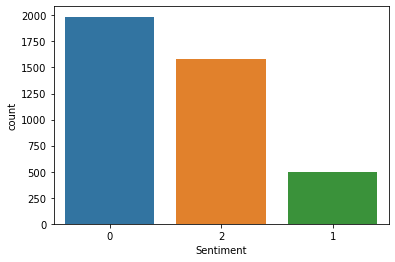

In [10]:
sns.countplot(df.LABELS)
plt.xlabel('Sentiment');

In [11]:
df['preprocessed_text'] = df['ThoughtSamplTEXT_1_CodeTR02'].str.lower()
df.drop(columns = ['ThoughtSamplTEXT_1_CodeTR02'],inplace=True)

In [12]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", 
                       "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", 
                       "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", 
                       "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am",
                       "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", 
                       "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
                       "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not",
                       "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", 
                       "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                       "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", 
                       "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have",
                       "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is",
                       "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would",
                       "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have",
                       "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have",
                       "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", 
                       "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did",
                       "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", 
                       "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", 
                       "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                       "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have",
                       "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have", 'u.s':'america', 'e.g':'for example'}

punct = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-",
                 "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 
                 'β': 'beta', '∅': '', '³': '3', 'π': 'pi', '!':' '}


In [13]:
from bs4 import BeautifulSoup

def clean_text(text):
    '''Clean emoji, Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = emoji.demojize(text)
    text = re.sub(r'\:(.*?)\:','',text)
    text = str(text).lower()    #Making Text Lowercase
    text = re.sub('\[.*?\]', '', text)
    #The next 2 lines remove html text
    text = BeautifulSoup(text, 'lxml').get_text()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",", "'")
    text = re.sub(r"[^a-zA-Z?.!,¿']+", " ", text)
    return text

def clean_contractions(text, mapping):
    '''Clean contraction using contraction mapping'''    
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    for word in mapping.keys():
        if ""+word+"" in text:
            text = text.replace(""+word+"", ""+mapping[word]+"")
    #Remove Punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy ."
    text = re.sub(r"([?.!,¿])", r" \1 ", text)
    text = re.sub(r'[" "]+', " ", text)
    return text

def clean_special_chars(text, punct, mapping):
    '''Cleans special characters present(if any)'''   
    for p in mapping:
        text = text.replace(p, mapping[p])
    
    for p in punct:
        text = text.replace(p, f' {p} ')
    
    specials = {'\u200b': ' ', '…': ' ... '}  
    for s in specials:
        text = text.replace(s, specials[s])
    
    return text

def remove_space(text):
    '''Removes awkward spaces'''   
    #Removes awkward spaces 
    text = text.strip()
    text = text.split()
    return " ".join(text)

def text_preprocessing_pipeline(text):
    '''Cleaning and parsing the text.'''
    text = clean_text(text)
    text = clean_contractions(text, contraction_mapping)
    text = clean_special_chars(text, punct, punct_mapping)
    text = remove_space(text)
    return text

In [14]:
df['preprocessed_text'] = df['preprocessed_text'].apply(text_preprocessing_pipeline)

In [15]:
from autocorrect import Speller
spell = Speller(lang='en')
df['preprocessed_text'] = df["preprocessed_text"].apply(lambda text:spell(text))

In [16]:
df['LABELS'] = df['LABELS'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4064 entries, 2 to 4564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   HAPPY              4064 non-null   int32 
 1   SAD                4064 non-null   int32 
 2   CALM               4064 non-null   int32 
 3   LABELS             4064 non-null   int64 
 4   preprocessed_text  4064 non-null   object
dtypes: int32(3), int64(1), object(1)
memory usage: 271.9+ KB


In [17]:
df1 = df.drop(columns=['HAPPY','SAD','CALM'])


from sklearn.model_selection import train_test_split

train_size=0.8
train_set , train_rem= train_test_split(df1, train_size=0.8)

# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
valid_set, test_set   = train_test_split(train_rem, test_size=0.5)

print(train_set.shape), 
print(valid_set.shape), 
print(test_set.shape), 

train_set.info()
valid_set.info()
test_set.info()

(3251, 2)
(406, 2)
(407, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3251 entries, 1718 to 4223
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   LABELS             3251 non-null   int64 
 1   preprocessed_text  3251 non-null   object
dtypes: int64(1), object(1)
memory usage: 76.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 1011 to 3676
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   LABELS             406 non-null    int64 
 1   preprocessed_text  406 non-null    object
dtypes: int64(1), object(1)
memory usage: 9.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 407 entries, 4433 to 4544
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   LABELS             407 non-null    int64 
 1   preprocessed_text  407 n

In [18]:
train_set.info()
valid_set.info()
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3251 entries, 1718 to 4223
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   LABELS             3251 non-null   int64 
 1   preprocessed_text  3251 non-null   object
dtypes: int64(1), object(1)
memory usage: 76.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 1011 to 3676
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   LABELS             406 non-null    int64 
 1   preprocessed_text  406 non-null    object
dtypes: int64(1), object(1)
memory usage: 9.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 407 entries, 4433 to 4544
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   LABELS             407 non-null    int64 
 1   preprocessed_text  407 non-null    object
dtypes: in

In [19]:
#Downloading Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [20]:
encoded_data_train = tokenizer.batch_encode_plus(
    train_set.preprocessed_text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)
encoded_data_val = tokenizer.batch_encode_plus(
    valid_set.preprocessed_text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)

input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(train_set.LABELS.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(valid_set.LABELS.values)

import torch
from tqdm.notebook import tqdm

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
C:\Users\NSK\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:2304: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [21]:
possible_labels = df.LABELS.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{0: 0, 2: 1, 1: 2}

In [22]:
#Downloading Pre-trained BERT Uncased base Model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",num_labels=3,output_attentions=False,
                                                      output_hidden_states=False)

from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 3
dataloader_train = DataLoader(dataset_train, sampler=RandomSampler(dataset_train),batch_size=batch_size)
dataloader_validation = DataLoader(dataset_val, sampler=SequentialSampler(dataset_val),batch_size=batch_size)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [23]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),lr=1e-5, eps=1e-8)

epochs = 5

scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(dataloader_train)*epochs)

C:\Users\NSK\anaconda3\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [24]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [25]:
import random
seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

#setting up the cpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(device)

cpu


In [26]:
#Model validation 
def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

In [27]:
# Getting metrics for each epoch
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:
        model.zero_grad()  
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       
        outputs = model(**inputs)
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), 'finetuned_BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/1084 [00:00<?, ?it/s]


Epoch 1
Training loss: 0.9802487900556234
Validation loss: 0.9191004237269654
F1 Score (Weighted): 0.3525830738530651


Epoch 2:   0%|          | 0/1084 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.8924137266607082
Validation loss: 0.9627730512224576
F1 Score (Weighted): 0.4392543272959893


Epoch 3:   0%|          | 0/1084 [00:00<?, ?it/s]


Epoch 3
Training loss: 0.694099604045608
Validation loss: 1.111636368530419
F1 Score (Weighted): 0.49992155524526294


Epoch 4:   0%|          | 0/1084 [00:00<?, ?it/s]


Epoch 4
Training loss: 0.5185320679110396
Validation loss: 1.5778627061107031
F1 Score (Weighted): 0.5266414841690151


Epoch 5:   0%|          | 0/1084 [00:00<?, ?it/s]


Epoch 5
Training loss: 0.42392003497347663
Validation loss: 1.7823689779068124
F1 Score (Weighted): 0.5271298531545767


In [28]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3, output_attentions=False, output_hidden_states=False)

model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [29]:
model.load_state_dict(torch.load('finetuned_BERT_epoch_{epoch}.model', map_location=torch.device('cpu')))

<All keys matched successfully>

In [30]:
_, predictions, true_vals = evaluate(dataloader_validation)

In [31]:
accuracy_per_class(predictions, true_vals)

Class: 0
Accuracy: 127/196

Class: 2
Accuracy: 11/39

Class: 1
Accuracy: 78/171



In [39]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score

analyzer = SentimentIntensityAnalyzer()

def vader_sentiment_result(sent):
    scores = analyzer.polarity_scores(sent)
    
    if (scores["pos"] > scores["neg"]) and (scores["pos"] > scores["neu"]):
        return 2
    elif scores["neg"] > scores["pos"] and (scores["neg"] > scores["neu"]):
        return 1
    return 0
  
df["vader_result"] = df["preprocessed_text"].apply(lambda x: vader_sentiment_result(x))


matrix = confusion_matrix(df["LABELS"], df["vader_result"])
print("Confusion Matrix:", matrix)

print(metrics.classification_report(df["LABELS"], df["vader_result"], digits=3))


Confusion Matrix: [[1883   24   80]
 [ 459   25   13]
 [1486   17   77]]
              precision    recall  f1-score   support

           0      0.492     0.948     0.648      1987
           1      0.379     0.050     0.089       497
           2      0.453     0.049     0.088      1580

    accuracy                          0.488      4064
   macro avg      0.441     0.349     0.275      4064
weighted avg      0.463     0.488     0.362      4064



In [40]:
def vader_sentiment_result_visualize(sent):
    scores_vis = analyzer.polarity_scores(sent)
    
    print("Overall sentiment dictionary is : ", scores_vis)
    print("sentence was rated as ", scores_vis['neg']*100, "% Negative")
    print("sentence was rated as ", scores_vis['neu']*100, "% Neutral")
    print("sentence was rated as ", scores_vis['pos']*100, "% Positive")
    print("Sentence Overall Rated As :", end = " ")
    
    if (scores_vis["pos"] > scores_vis["neg"]) and (scores_vis["pos"] > scores_vis["neu"]):
        return "HAPPY"
    elif scores_vis["neg"] > scores_vis["pos"] and (scores_vis["neg"] > scores_vis["neu"]):
        return "SAD"
    return "CALM"

sent1 = df.iat[1,4]
vader_sentiment_result_visualize(sent1)

Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'compound': 0.9869}
sentence was rated as  0.0 % Negative
sentence was rated as  73.8 % Neutral
sentence was rated as  26.200000000000003 % Positive
Sentence Overall Rated As : 

'CALM'